<a href="https://colab.research.google.com/github/Shreyaranjan16/Yesbankstock/blob/main/Copy_of_Yes_bank_closing_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

# A well-known bank in the Indian financial industry is Yes Bank. The Rana Kapoor fraud case has been in the headlines since 2018 as a result of it. Due to this, it was interesting to observe how it affected the company's stock prices and whether Time series models or other prediction models could properly reflect for such circumstances. Since the bank's foundation, this dataset has included closing, starting, highest, and lowest stock values for each month. Predicting the stock's monthly closing price is the main goal.

# **What is stock?**

###A financial instrument that reflects ownership in a corporation is a stock or share, commonly referred to as a company's "equity." "Shares" are the unit of measure for stock. The cornerstone of many individual investors' portfolios, stocks are often bought and sold on stock exchanges, though there can be private sales as well.

#**In order to implement your ideas and obtain insights from it, you must first understand your data.**

We clearly understood our issue and our goal, but there are still a few steps that must be taken in order to predict the closing price of the stock for the given month. These steps include performing Regression Analysis and Building a better model that can quickly and accurately predict our desired output.

So, to build a well performing model, we divided our effort into multiple parts in order to create a model that performs well:

**Feature Engineering**:- Introducing New Variables, Dummy Variables

**Univariate Analysis**:- Distplot, Histogram, Barplot

**Bivariate Analysis**:- Boxplot, Heatmap,

**Introduced Models**:- Linear Regression, Lasso, Ridge and decision tree  Regression

**We have 185 rows and 5 columns in our dataset. Here our dependent variable is Close and Independent variable is Open, High and Low.**

**Date :-** It denotes the month and year for a specific pricing.

**Open :-** The price at which a stock started trading that month is referred to as the "Open."

**High :-** The highest price for that particular month.

**Low :-** It describes the monthly minimum price.

**Close :-** It refers to the final trading price for that month, which we have to predict using regression.

In [ ]:
# Importing the libraries

import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from datetime import datetime     

# This technique is used to divide the dataset into a training set and a test set when building the model.
from sklearn.model_selection import train_test_split

#Import libraries for Regressor
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

# Import the matrix module to evaluate the model's performance.
from sklearn.metrics import *
import pandas.util.testing as tm

# Import the variance inflation factor technique to reduce multicollinearity in independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data set

from google.colab import drive
drive.mount('/content/drive')

Df=pd.read_csv('/content/drive/MyDrive/Yes bank-analysis/data_YesBank_StockPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Shape of the DataSet
Df.shape

(185, 5)

In [ ]:
# Obtain basic details about the features in our Dataframe.
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# fetching Top 10 rows from dataset using head() function
Df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
#look for bottom rows
Df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Check if there are any null values.
Df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Check if there are any duplicate rows.
len(Df[Df.duplicated()])

0

There are no Duplicate values in the Dataset


In [ ]:
Df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis(EDA)**

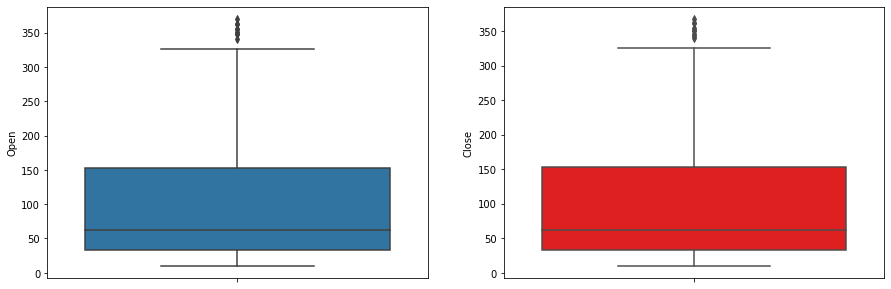

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Df['Open'])

plt.subplot(1,2,2)
sns.boxplot(y=Df['Close'],color='red')
plt.show()

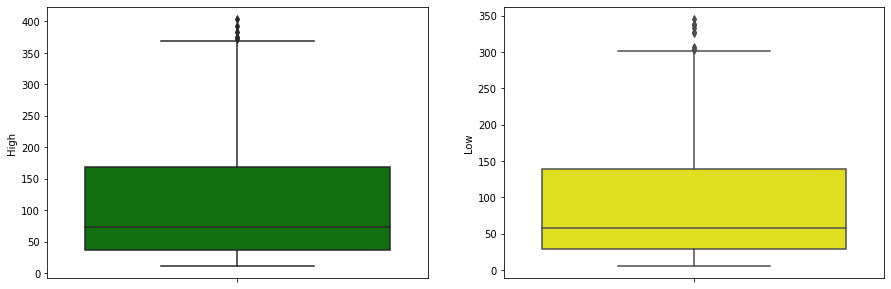

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Df['High'],color='green')

plt.subplot(1,2,2)
sns.boxplot(y=Df['Low'],color='yellow')
plt.show()

In [ ]:
# Changing 'Date' into datetime - 'YYYY-MM-DD' format
Df['Date'] = Df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y")) 

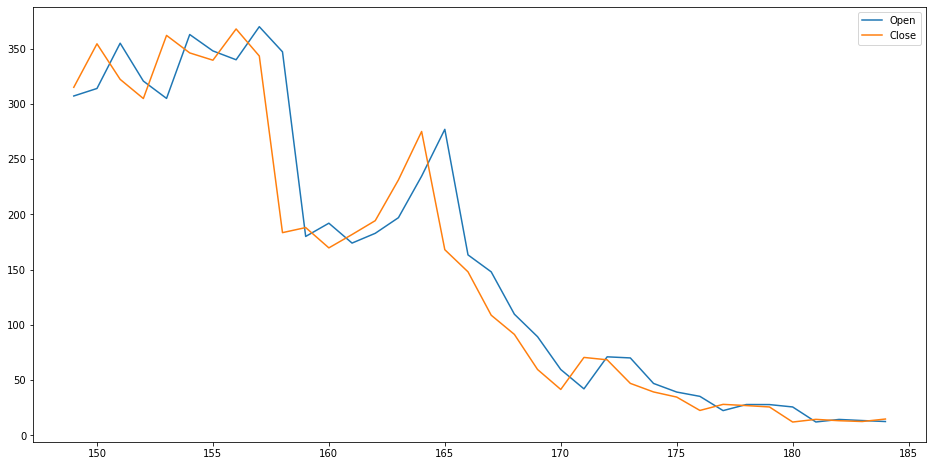

In [ ]:
#Plot Open vs Close price using line graph
# Display only last three year record

Df[['Open','Close']].tail(36).plot(kind='line',figsize=(16,8))

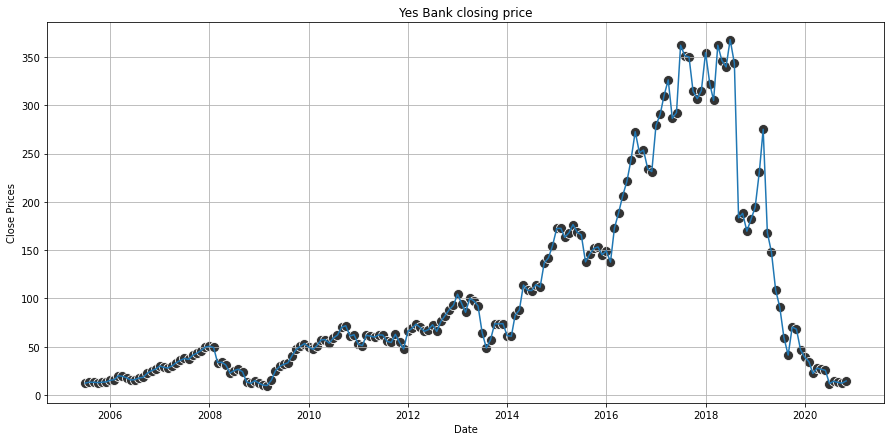

In [ ]:
# Yes Bank Closing Price Plotting
plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.plot(Df['Date'],Df['Close'])
plt.title('Yes Bank closing price')
sns.scatterplot(data=Df, x="Date", y="Close", s=100, color=".2")

#**Dependent variable of Close Price Stock**

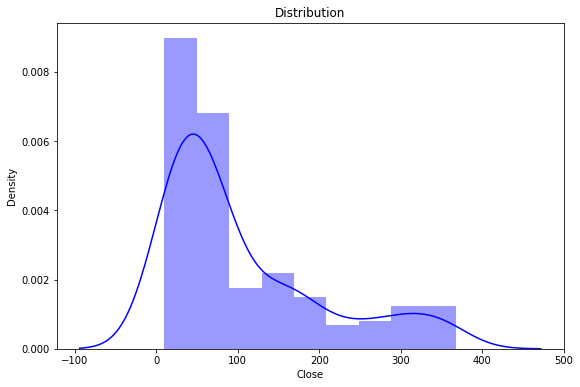

In [ ]:
# Depndent Variable is "Close"
# Normal Distribution
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(Df["Close"], color="blue")
plt.title('Distribution')
plt.show()

--Use log transformation to make it normal distribution

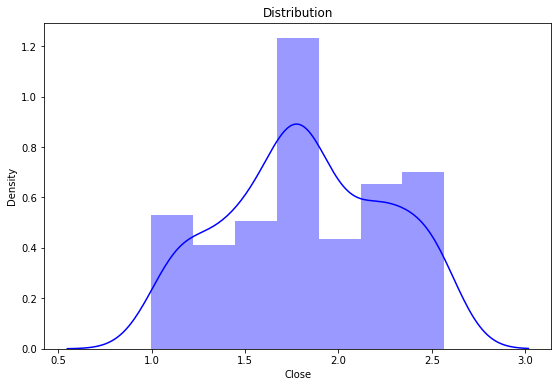

In [ ]:
# Distribution plot of 'Closing' For applying log transformation
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(np.log10(Df["Close"]), color="blue")
plt.title('Distribution')
plt.show()

#**Independent Variable Open , High and Low price of stock**

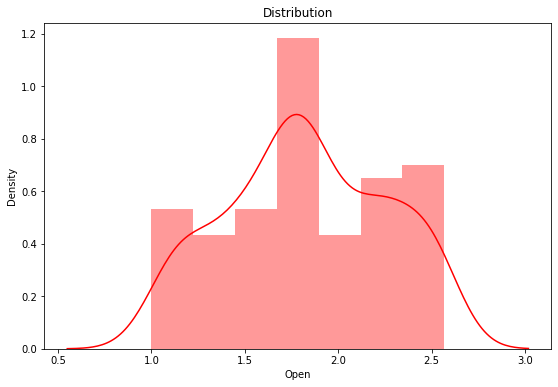

In [ ]:
# Distribution plot of 'Open' For applying log transformation
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(np.log10(Df["Open"]), color="Red")
plt.title('Distribution')
plt.show()

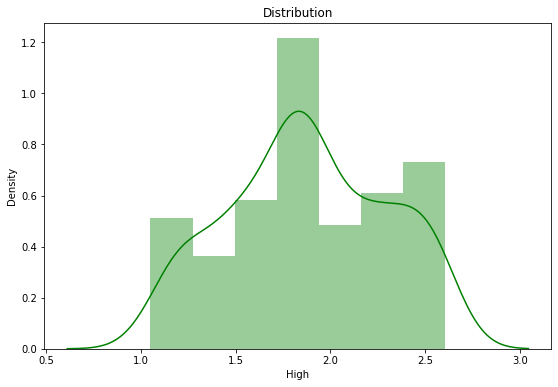

In [ ]:
# Distribution plot of 'High' For applying log transformation
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(np.log10(Df["High"]), color="Green")
plt.title('Distribution')
plt.show()

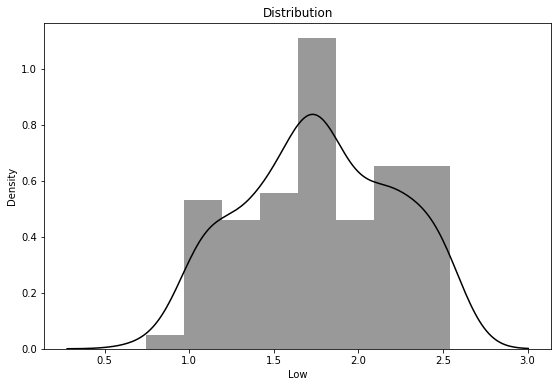

In [ ]:
# Distribution plot of 'Low price' For applying log transformation
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(np.log10(Df["Low"]), color="Black")
plt.title('Distribution')
plt.show()

#**Now, find out the relation between the Dependent Variable and Independent Variable**

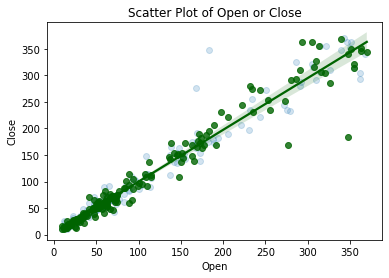

In [ ]:
# By using scatter plot, we can find out the relation b/w the Dependent Variable and Independent Variable
# Scatter Plot of 'Close or Open'
plt.scatter(Df['Close'],Df['Open'], alpha=0.2)
plt.title('Scatter Plot of Open or Close')
sns.regplot( data= Df, x ='Open', y ='Close', color="DarkGreen")
plt.show()

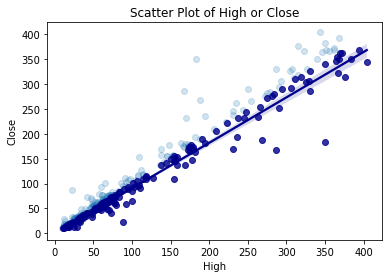

In [ ]:
# Scatter Plot Close or High
plt.scatter(Df['Close'],Df['High'], alpha=0.2)
plt.title('Scatter Plot of High or Close')
sns.regplot( data= Df, x ='High', y ='Close', color="DarkBlue")
plt.show()

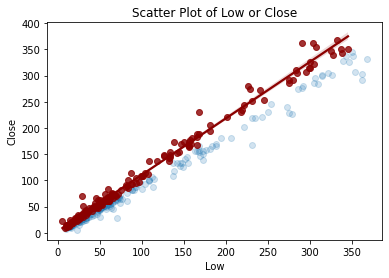

In [ ]:
# Scatter Plot Close or Low
plt.scatter(Df['Close'],Df['Low'], alpha=0.2)
plt.title('Scatter Plot of Low or Close')
sns.regplot(data= Df, x ='Low', y ='Close', color="DarkRed")
plt.show()

# **Correlation**

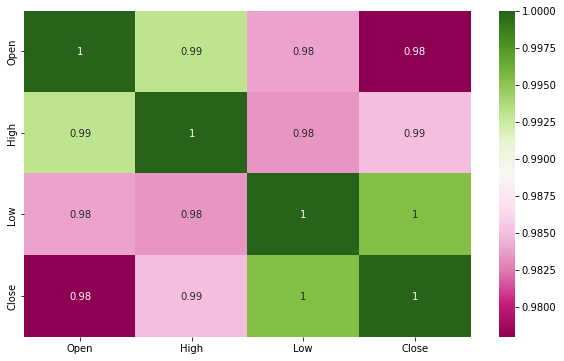

In [ ]:
# Check the correlation with the Heatmap.

plt.figure(figsize=(10,6))
correlation = Df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='PiYG')

Here, there is the highest correlation between all the variables.




# Using PairGrid to plot the entire dataframe while analyzing the relationship between the variables.

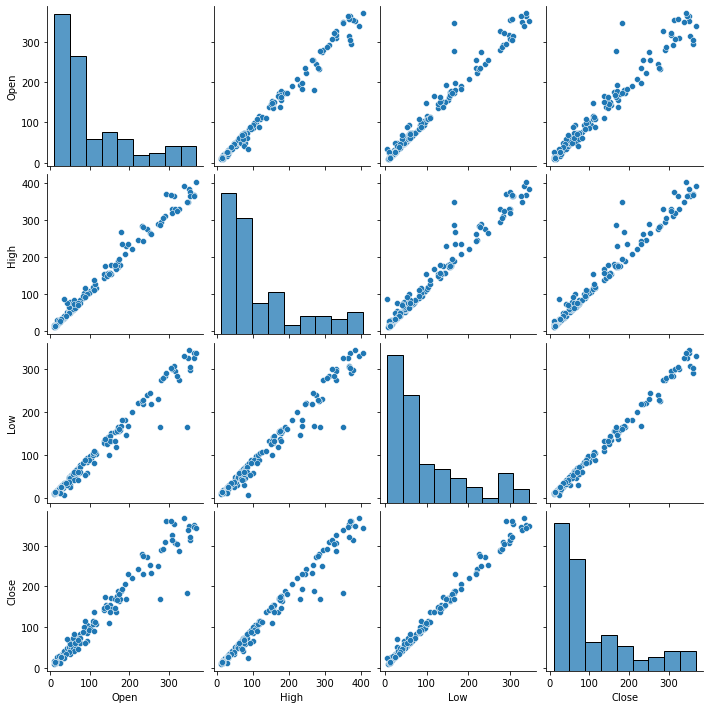

In [ ]:
# It plots every single column of our df against every other column.

sns.pairplot(Df,kind="scatter")

#**Multicollinearity**

Calculate the variation inflation factor (VIF), To determine the correlation between independent variables.

In [ ]:
def Calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calc_vif(Df[[i for i in Df.describe().columns if i not in ["Date", "Close"]]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have strong VIF ratings, we won't do feature engineering because each feature is critical for this specific use case.
Most indicators in the real world consider each of these characteristics to predict future values.

Due to the fact that each column is equally crucial for prediction, we are not deleting any columns.

Column removal resulted in the loss of important data (features) that are necessary for the model to make correct predictions.
It produces a poor model.

Therefore, we are not removing any features from the dataset while we attempt to predict the outcome, assess the model's performance with respect to multicollinearity, and make adjustments as necessary.

#**Train & Test DataSets**
* The dataset must be split into two groups.
* The training dataset is the first subset, which is used to fit the model.
* The model is not trained using the second subset. Instead, the model is given the dataset's input element before making predictions and comparing them to the predicted values. This second dataset is referred to as the test dataset.
* Test Dataset: Used to evaluate how well a machine learning model fits the data.

In [ ]:
# Split the datasets
X = Df.drop(columns=['Close','Date'])
y = Df['Close']


In [ ]:
# Data transforma:
from scipy.stats import zscore
x = X.apply(zscore)
y = np.log10(y)

In [ ]:
# Split our data into train and test datasets
# Train and Test Set data splitted into 70-30

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state= 1)

In [ ]:
# Shape of the Training dataset
print(x_train.shape)

(129, 3)


In [ ]:
# Shape of the Test dataset
print(x_test.shape)

(56, 3)


In [ ]:
# Train data 
y_train.head()

28    1.664454
44    0.999131
90    2.018742
33    1.532245
51    1.674953
Name: Close, dtype: float64

In [ ]:
# Transform the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**We Create 5 Regression Models for our Data.**
##**1} Linear Regression**
##**2} Lasso Regression**
##**3} Ridge Regression**
##**4} Decision Tree Regression**

#**Implementing Linear Regression**

Linear regression is the most basic machine learning approach that can be applied to this data.The result of the linear regression model is an equation showing how the independent variables and dependent variable related to each other.

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
round(lr.score(x_train,y_train), 4)

0.8173

In [ ]:
round(lr.score(x_test, y_test), 4)

0.8103

In [ ]:
Prediction=lr.predict(x_test)
Prediction

array([1.51051772, 1.52535953, 1.63351992, 1.47053647, 2.01753636,
       2.72474873, 1.63062456, 1.51221798, 1.52084619, 1.61563603,
       2.07014272, 1.60608294, 1.46589662, 2.61164548, 1.69505187,
       1.60471662, 1.51876008, 1.94958655, 1.80896492, 1.75375984,
       1.52655473, 1.47601854, 1.82992088, 1.63149445, 2.04707499,
       1.48318626, 1.47204573, 1.60539559, 1.52917291, 1.66524685,
       2.39919581, 2.75063943, 1.68032106, 2.34800617, 1.77188771,
       1.61572395, 2.31888274, 1.63180564, 1.63637996, 2.05660076,
       2.78005687, 2.06183654, 1.51860755, 1.46720327, 2.16852162,
       1.96028538, 1.80377173, 1.62477494, 1.81352617, 1.97696669,
       2.42709798, 2.25767339, 1.9726743 , 1.68605775, 2.05052332,
       1.48491485])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Creating the DataFrames of test & train Dataset
train_Dataframe = pd.DataFrame(x_train,y_train)
test_Dataframe = pd.DataFrame(y_test)
test_Dataframe.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [ ]:
test_Dataframe['Predicted Closing Price']= Prediction
test_Dataframe.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.510518
179,1.408240,1.525360
66,1.720903,1.633520
40,1.088490,1.470536
166,2.170115,2.017536


In [ ]:
Prediction[0:5]

array([1.51051772, 1.52535953, 1.63351992, 1.47053647, 2.01753636])

In [ ]:
#Testing Performence of Linear Regression Model
print('Performance of Linear Regression Model')
print("MSE :",round(mean_squared_error(y_test, Prediction),4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, Prediction)),4))
print("MAE :",round(mean_absolute_error(y_test, Prediction),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, Prediction),4))
print("R2 :",round(r2_score(y_test, Prediction),4))

Performance of Linear Regression Model
MSE : 0.0329
RMSE : 0.1814
MAE : 0.1594
MAPE : 0.0964
R2 : 0.8103


Text(0, 0.5, 'Predicted test value')

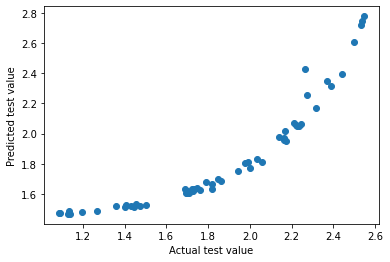

In [ ]:
# Sctter Plot of Actual vs Predicted Values
plt.scatter(y_test,Prediction)
plt.xlabel('Actual test value')
plt.ylabel('Predicted test value')

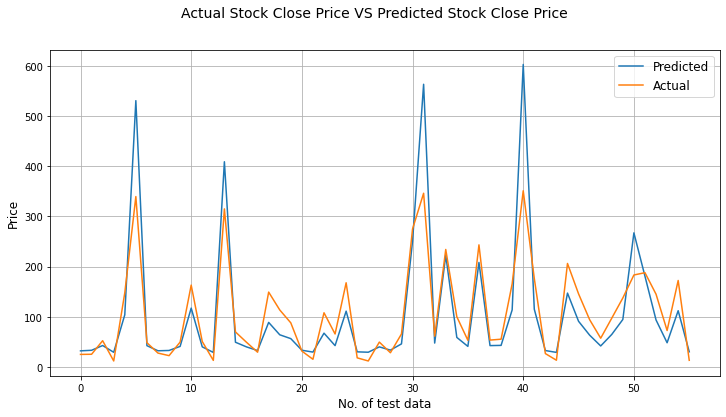

In [ ]:
# Actual Price vs Prediction price for Linear Regression plot:

plt.figure(figsize=(12,6))
plt.plot(10**(Prediction))             
plt.plot(10**(np.array(y_test)))           
plt.xlabel("No. of test data",fontsize= 12)
plt.ylabel("Price",fontsize= 12)
plt.suptitle("Actual Stock Close Price VS Predicted Stock Close Price",fontsize=14)
plt.legend(["Predicted","Actual"],fontsize= 12)
plt.grid()
plt.show()

#**Implementing Lasso Regression**

Lasso(least absolute shrinkage and selection operator) regression is another technique of Parameter estimation regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization enhances the accessibility of models.

In [ ]:
lasso = Lasso(alpha=0.001, max_iter=5000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=5000)

In [ ]:
# Checking Accuracy Score of Lasso Rigression Model
lasso_score = lasso.score(x_train,y_train)
lasso_score

0.8172097089169995

In [ ]:
# Lasso Regression Predicted train Data Value:
pred_Lasso = lasso.predict(x_test)
pred_Lasso

array([1.5133262 , 1.52801613, 1.63532276, 1.47376852, 2.01608526,
       2.71565783, 1.63271877, 1.51506221, 1.52367008, 1.6175025 ,
       2.067719  , 1.60787406, 1.46905748, 2.60347777, 1.69601712,
       1.60666233, 1.52151359, 1.94836961, 1.80909445, 1.75421417,
       1.52925871, 1.47918603, 1.82965909, 1.63327633, 2.04467051,
       1.48619575, 1.47527006, 1.60726759, 1.53179547, 1.66666733,
       2.39369319, 2.74171344, 1.68167269, 2.34323653, 1.77221604,
       1.61747316, 2.31373799, 1.63341439, 1.63812944, 2.05416133,
       2.77058624, 2.05934027, 1.52130199, 1.47035766, 2.16502591,
       1.95892127, 1.80381635, 1.62648204, 1.8133562 , 1.97548582,
       2.42529053, 2.25438486, 1.97119134, 1.68704891, 2.04818778,
       1.48822739])

In [ ]:
# Tesingt performance of Lasso Regression Model
print('Performance of Lasso Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Lasso),4))
print("R2 :",round(r2_score(y_test, pred_Lasso), 4))

Performance of Lasso Regression Model
MSE : 0.0331
RMSE : 0.1818
MAE : 0.1598
MAPE : 0.0968
R2 : 0.8094


In [ ]:
# Adding a column to the test dataset will allow to compare the Actual and Predicted values.

test_Dataframe['Lasso Predicted Closing Price'] = pred_Lasso
lasso_dataframe = test_Dataframe.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_dataframe.head(6)

,Actual Closing Price,Lasso Predicted Closing Price
16,1.403464,1.513326
179,1.408240,1.528016
66,1.720903,1.635323
40,1.088490,1.473769
166,2.170115,2.016085
155,2.530968,2.715658


Text(0, 0.5, 'Predicted Value')

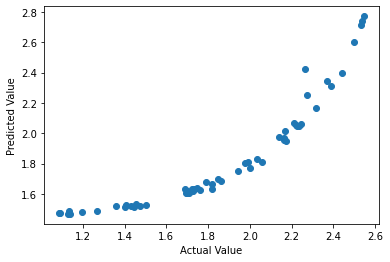

In [ ]:
# Scatter Plot Actual Value vs Predicted Value
plt.scatter((y_test), (pred_Lasso))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

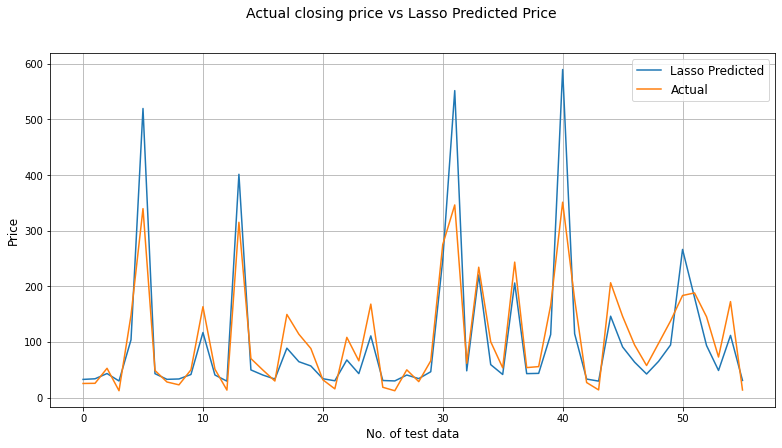

In [ ]:
# Actual Price vs Prediction price for Linear Regression plot:

plt.figure(figsize=(13,6.5))
plt.plot(10**(pred_Lasso))
plt.plot(10**(np.array(y_test)))
plt.xlabel("No. of test data",fontsize= 12)
plt.ylabel("Price",fontsize= 12)
plt.suptitle("Actual closing price vs Lasso Predicted Price",fontsize=14)
plt.legend(["Lasso Predicted","Actual"],fontsize= 12)
plt.grid(True)
plt.show()

# **Implementation of Ridge Regression**

Ridge regression is a model-tuning technique that is used to analyse any multicollinear data. L2 regularisation is done using this technique. The projected values vary significantly from the actual values when the problem of multicollinearity is present, least-squares are unbiased, and variances are large.

In [ ]:
#Importing Libraries
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Accuracy 
round(ridge.score(x_train, y_train), 4)

0.817

In [ ]:
#Prediction
ridge_y_pred = ridge.predict(x_test)
ridge_y_pred


array([1.51017378, 1.5259859 , 1.63907806, 1.47188475, 2.02146721,
       2.73503886, 1.63778493, 1.51080247, 1.524587  , 1.61789124,
       2.07500812, 1.60654702, 1.46770729, 2.61334115, 1.69767432,
       1.60720314, 1.51882939, 1.95530201, 1.79835039, 1.75167173,
       1.52819765, 1.47907706, 1.83210375, 1.62530263, 2.04812013,
       1.48506124, 1.47343764, 1.60442851, 1.53099113, 1.6706026 ,
       2.38276365, 2.76529186, 1.68560839, 2.35791841, 1.76751664,
       1.6164653 , 2.31150619, 1.63375456, 1.64141043, 2.06040332,
       2.79005975, 2.06538497, 1.51888993, 1.4688162 , 2.16551121,
       1.95623534, 1.80789828, 1.62824403, 1.81344528, 1.98130366,
       2.47491069, 2.22152103, 1.98031595, 1.68643358, 2.04332823,
       1.49003722])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Tesingt performance of Ridge Regression Model
print('Performance of Ridge Regression Model')
print("MSE :",round(mean_squared_error(y_test, ridge_y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, ridge_y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, ridge_y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, ridge_y_pred),4))
print("R2 :",round(r2_score(y_test, ridge_y_pred), 4))

Performance of Ridge Regression Model
MSE : 0.0337
RMSE : 0.1835
MAE : 0.1614
MAPE : 0.0973
R2 : 0.8058


Text(0, 0.5, 'Predicted Value')

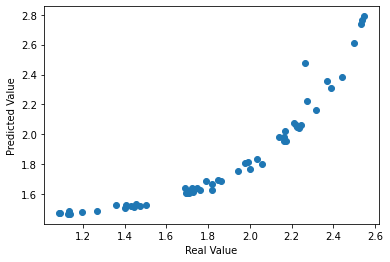

In [ ]:
plt.scatter((y_test),(ridge_y_pred))
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')

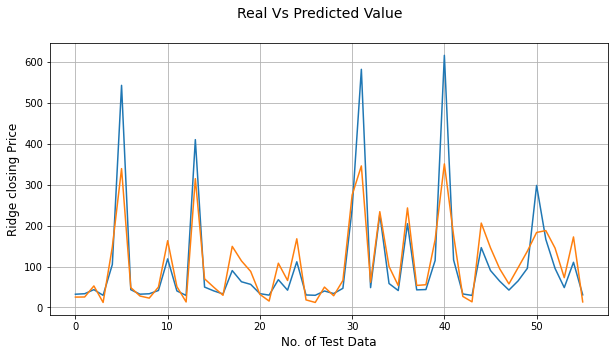

In [ ]:
# Plotting the Graph
plt.figure(figsize=(10,5))
plt.plot(10**(ridge_y_pred))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Real Vs Predicted Value', fontsize= 14)
plt.xlabel('No. of Test Data', fontsize = 12)
plt.ylabel('Ridge closing Price', fontsize= 12)
plt.grid()

# **Implementing Decision Tree Regression**

Decision tree regression trains a model in the form of a tree to predict data in the future and generate useful continuous output by observing the properties of an item.

In [ ]:
import sklearn
#Importing Libraries
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#Accuracy 
dtr.score(x_train,y_train)

1.0

In [ ]:
#Prediction
dtr_y_pred=dtr.predict(x_test)
dtr_y_pred

array([1.35755372, 1.48158594, 1.73631681, 1.09551804, 2.23782011,
       2.54406804, 1.6716356 , 1.40568779, 1.48158594, 1.7100327 ,
       2.23691496, 1.67495295, 1.11360915, 2.48415742, 1.85648721,
       1.70389295, 1.44932409, 2.15253295, 1.96773513, 1.94684511,
       1.47943134, 1.18554215, 2.03494915, 1.67870043, 2.23691496,
       1.30276371, 1.09551804, 1.70389295, 1.48158594, 1.8344207 ,
       2.44575984, 2.50819293, 1.86770313, 2.36410052, 1.9330315 ,
       1.75663611, 2.36410052, 1.7707784 , 1.73631681, 2.23691496,
       2.50819293, 2.23691496, 1.42862067, 1.11360915, 2.2884728 ,
       2.15253295, 2.0187421 , 1.75663611, 2.03494915, 2.15253295,
       2.27584094, 2.2884728 , 2.18132899, 1.81934648, 2.23691496,
       1.07736791])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Tesingt performance of Decision Tree Regression Model
print('Performance of Decision tree Regression Model')
print("MSE :",round(mean_squared_error(y_test, dtr_y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, dtr_y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, dtr_y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, dtr_y_pred),4))
print("R2 :",round(r2_score(y_test, dtr_y_pred), 4))

Performance of Decision tree Regression Model
MSE : 0.0016
RMSE : 0.0404
MAE : 0.0286
MAPE : 0.0167
R2 : 0.9906


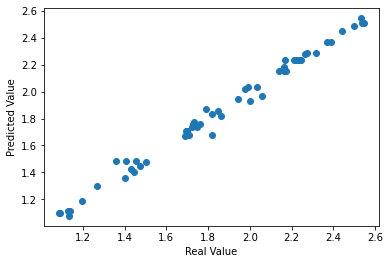

In [ ]:
plt.scatter((y_test), (dtr_y_pred))
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

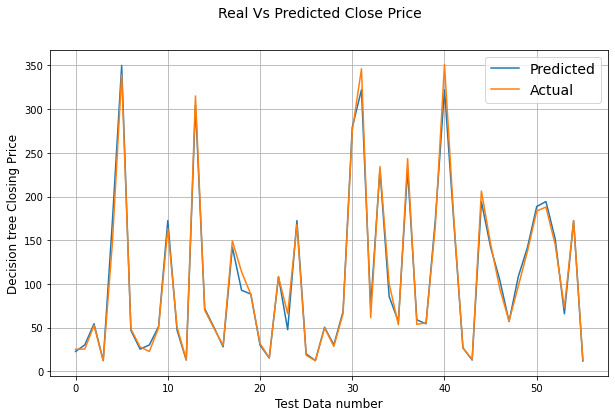

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(dtr_y_pred))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Real Vs Predicted Close Price', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('Test Data number', fontsize= 12)
plt.ylabel('Decision tree Closing Price', fontsize= 12)
plt.grid()

In [ ]:
# Compare all the Models
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  # Need to pass each model one by one
  for model in models:
    # fiting each model training dataset
    model.fit(X_train, y_train)
    # predicting y values for each model
    y_pred = model.predict(X_test)
    # Getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    # Getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)

    # Getting all above into dataframes
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2
    
    # To obtain values for the following model's rows
    i=i+1
 # Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df
  
# Pass through function now
model = [lr,lasso,ridge,dtr]


In [ ]:
# Evaluation Matrics Comparison
Eva_matrics_compare_df = compare_model(x_train, x_test, y_train, y_test, model)
Eva_matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
Eva_matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
3,Ridge,0.0337,0.1835,0.1614,0.0973,0.8058
2,Lasso,0.0331,0.1818,0.1598,0.0968,0.8094
1,LinearRegression,0.0329,0.1814,0.1594,0.0964,0.8103
0,DecisionTreeRegressor,0.0016,0.0406,0.0288,0.0169,0.9905


# **Conclusion**

#**In the EDA section, we noted that**
1. The trend of the price of Yes Bank's stock increased until 2018 and then Close,Open,High,Low price decreased.
2. Based on the open vs. close price graph, we concluded that Yes Bank's stock fell significantly after 2018.
3. Both duplicate and null values are absent, as we have seen. But object data type values are available for the Date feature. Therefore, we transformed it to the correct date format, YYYY-MM-DD.
4. The dependent and independent values were found to be linearly related.
5. The data contained a significant amount of multicollinearity.
6.Decision Tree regression Is best model for yes bank stock closing price data this model use for further prediction.
* Visualization has allowed us to notice that the closing price of the stock has suddenly fallen starting in 2018. It seems reasonable that the Yes Bank stock price was significantly impacted by the Rana Kapoor case fraud.

* In this work, We Create 5 Regression Models for our Data.

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Decision Tree Regression
* These four models gives us the following results: High, Low, Open are directly correlate with the Closing price of stocks.





